**DATA LOADING & UNDERSTANDING**

In [ ]:
import pandas as pd  #data handling
import numpy as np #numerical operations
import matplotlib.pyplot as plt #visualizations
import seaborn as sns


load dataset

In [ ]:
df = pd.read_csv("/content/retail_sales.csv")


In [ ]:
df.head() #shows first 5 rows , This helps you see what kind of data you have


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.shape


(1000, 9)

In [ ]:
df.info()  #displays column names , datatypes , missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**DATA CLEANING & PREPROCESSING**

why cleaning is important?
-raw data is messy , inconsistent,error prone

clean data = correct analysis

In [ ]:
#Convert Date Column

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df

#Dates must be in datetime format
#Needed for time-series forecasting

/tmp/ipython-input-3623266778.py:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
#check missing values

df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
#check duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
#verify total amount (quality check)
df['Calculated_Total'] = df['Quantity'] * df['Price per Unit']
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated_Total
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150


In [ ]:
(df['Calculated_Total'] == df['Total Amount']).value_counts()


,count
True,1000


**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
#overall sales

total_revenue = df['Total Amount'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 456000


In [ ]:
#Sales by Product Category

category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales


,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


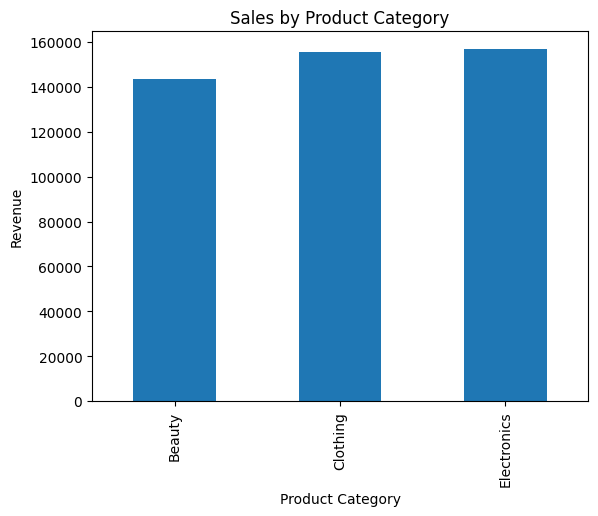

In [ ]:
#visualization - it shows Which category earns the most? , Where should marketing focus?

category_sales.plot(kind='bar', title='Sales by Product Category')
plt.ylabel('Revenue')
plt.show()


In [ ]:
#Sales Trend Over Time

daily_sales = df.groupby('Date')['Total Amount'].sum()


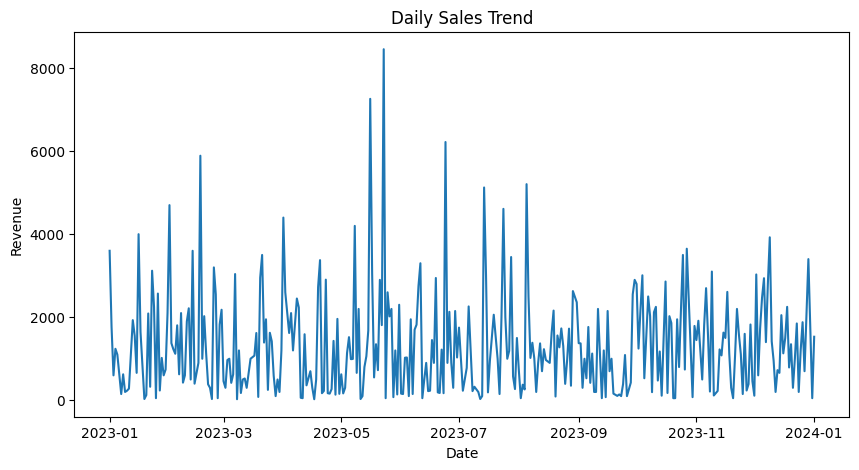

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(daily_sales)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


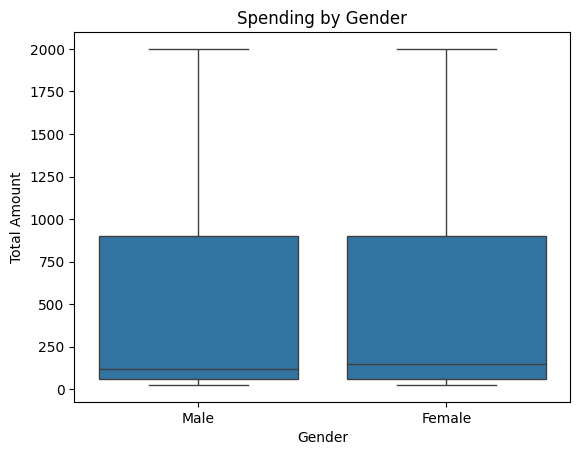

In [ ]:
#Customer Demographics Analysis

sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title("Spending by Gender")
plt.show()


**FEATURE ENGINEERING**

In [ ]:
#Extract Date Features

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:
#monthly sales

monthly_sales = df.groupby(['Year','Month'])['Total Amount'].sum().reset_index()
monthly_sales

,Year,Month,Total Amount
0,2023,1,35450
1,2023,2,44060
2,2023,3,28990
3,2023,4,33870
4,2023,5,53150
5,2023,6,36715
6,2023,7,35465
7,2023,8,36960
8,2023,9,23620
9,2023,10,46580


**SALES FORECASTING**

In [ ]:
monthly_sales['Date'] = pd.to_datetime(
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str) + '-01'
)

ts = monthly_sales.set_index('Date')['Total Amount']


In [ ]:
#Simple Forecast Using Moving Average
ts_ma = ts.rolling(window=3).mean()


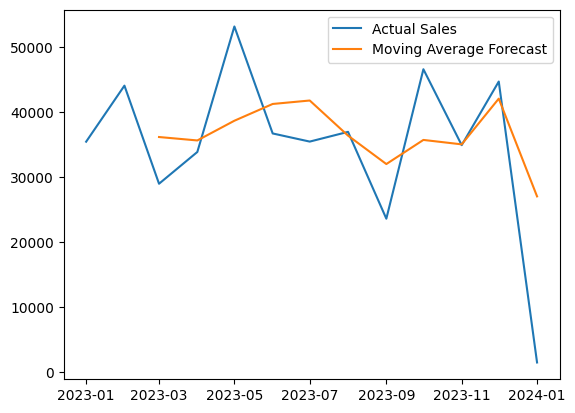

In [ ]:
plt.plot(ts, label='Actual Sales')
plt.plot(ts_ma, label='Moving Average Forecast')
plt.legend()
plt.show()


In [ ]:
dashboard_df = df[[
    'Transaction ID',
    'Date',
    'Customer ID',
    'Gender',
    'Age',
    'Product Category',
    'Quantity',
    'Price per Unit',
    'Total Amount'
]]


In [ ]:
dashboard_df['Year'] = dashboard_df['Date'].dt.year
dashboard_df['Month'] = dashboard_df['Date'].dt.month
dashboard_df['Month Name'] = dashboard_df['Date'].dt.month_name()


/tmp/ipython-input-1816741999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dashboard_df['Year'] = dashboard_df['Date'].dt.year
/tmp/ipython-input-1816741999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dashboard_df['Month'] = dashboard_df['Date'].dt.month
/tmp/ipython-input-1816741999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
dashboard_df.to_csv("retail_sales_powerbi.csv", index=False)
